In [1]:
pip install pandas numpy scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 

In [3]:
customer_data = pd.read_csv(r"C:\Users\NCHEWI ENYA\Downloads\customer_segmentation\customer_data.csv")
transaction_data = pd.read_csv(r"C:\Users\NCHEWI ENYA\Downloads\customer_segmentation\transaction_data.csv")

In [4]:
customer_data

,Customer ID,Age,Gender,Income,Occupation,Location,Purchase Frequency
0,1,56,Male,45939,Lawyer,New York,15
1,2,69,Male,68925,Teacher,Houston,6
2,3,46,Male,62941,Artist,Phoenix,8
3,4,32,Male,41834,Artist,Phoenix,5
4,5,60,Male,38047,Teacher,New York,16
...,...,...,...,...,...,...,...
95,96,42,Female,45184,Lawyer,Phoenix,19
96,97,62,Female,113384,Engineer,New York,11
97,98,58,Female,62107,Lawyer,Phoenix,2
98,99,46,Female,106202,Teacher,Houston,14


In [5]:
transaction_data

,Transaction ID,Customer ID,Purchase Date,Product ID,Product Category,Quantity,Price,Total Spend
0,1,47,2023-01-01,1062,Electronics,4,275.40,1101.60
1,2,94,2023-01-02,1024,Groceries,6,320.40,1922.40
2,3,62,2023-01-03,1055,Groceries,9,136.36,1227.24
3,4,69,2023-01-04,1032,Groceries,1,78.28,78.28
4,5,76,2023-01-05,1037,Toys,5,419.12,2095.60
...,...,...,...,...,...,...,...,...
195,196,1,2023-07-15,1015,Books,1,432.44,432.44
196,197,3,2023-07-16,1007,Toys,2,406.66,813.32
197,198,77,2023-07-17,1003,Electronics,3,331.07,993.21
198,199,92,2023-07-18,1003,Books,1,279.92,279.92


In [7]:
# calculate total spend and purchase frequency for each customer
agg_transaction_data = transaction_data.groupby('Customer ID').agg({
    'Total Spend':'sum',
    'Transaction ID': 'count'
}).reset_index()

agg_transaction_data.rename(columns={'Total Spend':'total_spend','Transaction ID':'purchase_frequency'}, inplace=True)
                                                                   

In [8]:
agg_transaction_data

,Customer ID,total_spend,purchase_frequency
0,1,816.16,2
1,2,3006.95,2
2,3,813.32,1
3,4,1223.92,2
4,5,1128.27,2
...,...,...,...
83,94,2788.14,2
84,95,2835.50,4
85,96,3936.45,3
86,99,9545.60,4


In [9]:
# Merge customer data with aggregated data
merge_data = pd.merge(customer_data, agg_transaction_data, on='Customer ID', how='left')

In [10]:
merge_data

,Customer ID,Age,Gender,Income,Occupation,Location,Purchase Frequency,total_spend,purchase_frequency
0,1,56,Male,45939,Lawyer,New York,15,816.16,2.0
1,2,69,Male,68925,Teacher,Houston,6,3006.95,2.0
2,3,46,Male,62941,Artist,Phoenix,8,813.32,1.0
3,4,32,Male,41834,Artist,Phoenix,5,1223.92,2.0
4,5,60,Male,38047,Teacher,New York,16,1128.27,2.0
...,...,...,...,...,...,...,...,...,...
95,96,42,Female,45184,Lawyer,Phoenix,19,3936.45,3.0
96,97,62,Female,113384,Engineer,New York,11,NaN,NaN
97,98,58,Female,62107,Lawyer,Phoenix,2,NaN,NaN
98,99,46,Female,106202,Teacher,Houston,14,9545.60,4.0


In [11]:
from sklearn.preprocessing import StandardScaler

In [13]:
# select columns for clustering
columns_to_scale = ['Age','Income','total_spend','purchase_frequency']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(merge_data[columns_to_scale])

# dataframe with scaled features
scaled_data = pd.DataFrame(scaled_features, columns=columns_to_scale)

In [14]:
scaled_data

,Age,Income,total_spend,purchase_frequency
0,0.853003,-1.138609,-0.864815,-0.203888
1,1.729608,-0.517209,0.060455,-0.203888
2,0.178692,-0.678980,-0.866015,-0.951479
3,-0.765343,-1.249583,-0.692600,-0.203888
4,1.122728,-1.351960,-0.732997,-0.203888
...,...,...,...,...
95,-0.091032,-1.159019,0.453025,0.543702
96,1.257590,0.684688,NaN,NaN
97,0.987866,-0.701526,NaN,NaN
98,0.178692,0.490531,2.822023,1.291293


In [15]:
# drop empty rows
scaled_data = scaled_data.dropna()

In [16]:
scaled_data

,Age,Income,total_spend,purchase_frequency
0,0.853003,-1.138609,-0.864815,-0.203888
1,1.729608,-0.517209,0.060455,-0.203888
2,0.178692,-0.678980,-0.866015,-0.951479
3,-0.765343,-1.249583,-0.692600,-0.203888
4,1.122728,-1.351960,-0.732997,-0.203888
...,...,...,...,...
93,-0.158463,0.339709,-0.031959,-0.203888
94,-0.023601,-1.226955,-0.011956,1.291293
95,-0.091032,-1.159019,0.453025,0.543702
98,0.178692,0.490531,2.822023,1.291293


In [17]:
import os
os.environ['OMP_NUM_THREADS']='1'

In [18]:
from sklearn.cluster import KMeans

In [19]:
# determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

C:\Users\NCHEWI ENYA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\NCHEWI ENYA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\NCHEWI ENYA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\NCHEWI ENYA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have

In [20]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [21]:
import matplotlib.pyplot as plt

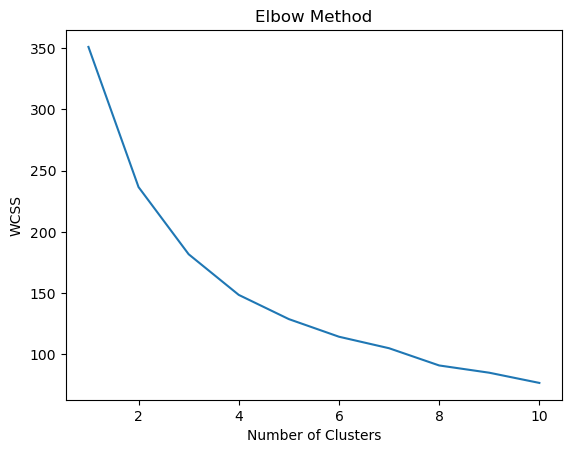

In [22]:
# plot wcss values to visualize the elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
# allign number of rows 
original_data = merge_data.copy()

In [24]:
original_data = original_data.dropna()

In [25]:
print(len(scaled_data))
print(len(original_data))

88
88


In [26]:
# fit KMeans with optimal number of clusters
kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
original_data['Cluster'] = kmeans.fit_predict(scaled_data)

C:\Users\NCHEWI ENYA\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [27]:
merge_data.loc[original_data.index, 'Cluster'] = original_data['Cluster']

In [28]:
original_data

,Customer ID,Age,Gender,Income,Occupation,Location,Purchase Frequency,total_spend,purchase_frequency,Cluster
0,1,56,Male,45939,Lawyer,New York,15,816.16,2.0,4
1,2,69,Male,68925,Teacher,Houston,6,3006.95,2.0,2
2,3,46,Male,62941,Artist,Phoenix,8,813.32,1.0,8
3,4,32,Male,41834,Artist,Phoenix,5,1223.92,2.0,8
4,5,60,Male,38047,Teacher,New York,16,1128.27,2.0,4
...,...,...,...,...,...,...,...,...,...,...
93,94,41,Male,100623,Engineer,Los Angeles,15,2788.14,2.0,3
94,95,43,Male,42671,Lawyer,Chicago,15,2835.50,4.0,0
95,96,42,Female,45184,Lawyer,Phoenix,19,3936.45,3.0,0
98,99,46,Female,106202,Teacher,Houston,14,9545.60,4.0,6


In [29]:
# export original_data for visualization
original_data.to_csv('C:/Users/NCHEWI ENYA/Downloads/customer_segmentation.csv', index=False)